<a href="https://colab.research.google.com/github/rafflds/Censo/blob/main/Censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=20, color=blue>Fonte dos Dados

**Fonte (adaptado):** https://www.kaggle.com/laotse/credit-risk-dataset

## Imports

In [28]:
import numpy as np
import pandas as pd

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Base de dados

In [3]:
base_censo = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Bases de dados/census.csv')
base_censo.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Dados estatísticos

In [4]:
base_censo.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Verificação de valores faltantes

In [5]:
# Somar os valores nulos na base de dados
base_censo.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Visualização dos Dados

In [17]:
# Quantidade de registros de uma coluna
base_censo['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


<Axes: xlabel='income', ylabel='count'>

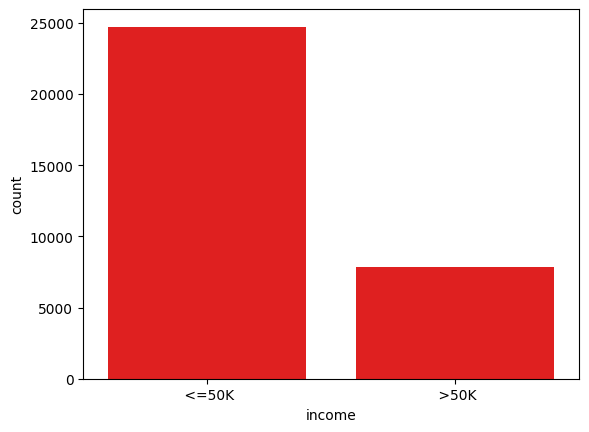

In [27]:
# Temos 24mil pessoas com o 'rendimento' inferior ou igual a 50 mil
# Temos 7mil pessoas com o 'rendimento' superior a 50 mil
sns.countplot(x='income', data=base_censo, color='red')

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

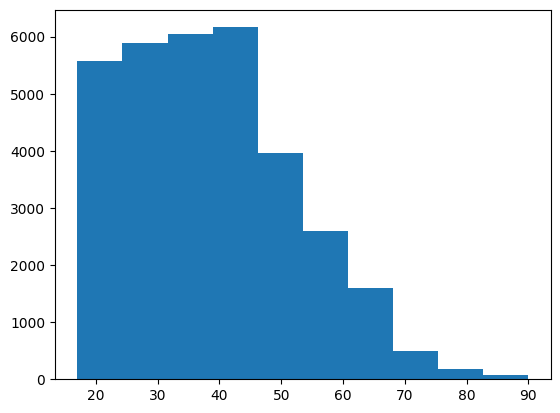

In [23]:
# Mais de 6mil pessoas tem entre 40 e 45 anos
# Menos de 500 pessoas tem entre 80 e 90 anos
# Entre 5mil e 6mil pessoas, tem entre 20 e 25 anos
plt.hist(x='age', data=base_censo)

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

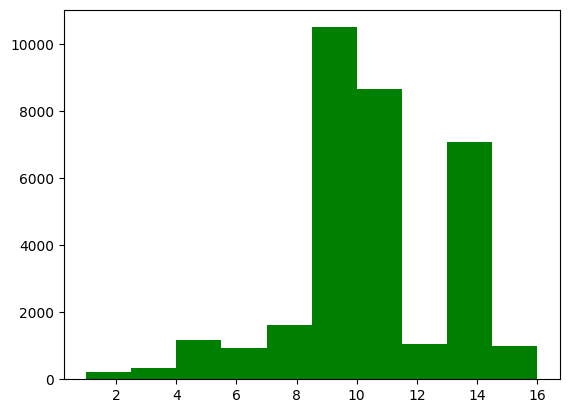

In [26]:
# Temos mais de 10mil pessoas que estudaram entre 8 a 10 anos
# Menos de 500 pessoas estudaram 2 anos
plt.hist(x='education-num', data=base_censo, color='green')

**Empresa privada (private)**
* Pessoas que ganham menor ou igual a 50 mil = 17.733 mil pessoas
* Pessoas que ganham mais de 50 mil = 4.900 mil pessoas

**Governo local (local-gov)**
* Pessoas que ganham menor ou igual a 50 mil = 1.476 mil pessoas
* Pessoas que ganham mais de 50 mil = 617 pessoas

**Não identificado (?)**
* Pessoas que ganham menor ou igual a 50 mil = 1.645 mil pessoas
* Pessoas que ganham mais de 50 mil = 191 pessoas

In [29]:
grafico = px.treemap(base_censo, path=['workclass', 'income'])
grafico.show()